# SUMMARIZATION TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING THE DIFFERENT SUMMARIZATION TECHNIQUES

### SECOND DATASET - MULTINEWS WITH DISCUSSION ABOUT A VETERANS PAYMENT

In [31]:
import pandas as pd
import re

# Define the file paths
src_file = 'datasets/multi_news/val.txt.src'  
tgt_file = 'datasets/multi_news/val.txt.tgt' 

# Load the .txt.src file (source articles)
with open(src_file, 'r', encoding='utf-8') as src:
    articles = src.readlines()

# Load the .txt.tgt file (target summaries)
with open(tgt_file, 'r', encoding='utf-8') as tgt:
    summaries = tgt.readlines()

dict_multinews = {'articles': articles, 
                 'summary': summaries}


# Create DataFrames
multinews_df = pd.DataFrame(dict_multinews)

# Clean the newlines from both columns
multinews_df['articles'] = multinews_df['articles'].str.strip()
multinews_df['summary'] = multinews_df['summary'].str.strip()

text = multinews_df.iloc[1].articles
original_summary =  multinews_df.iloc[1].summary
print(f'The summary of the articles is:\n{original_summary}')
articles = text.split('.  ')
articles = [article.strip() for article in articles]


df_sum_3 = pd.DataFrame()
# Assign the list of articles to a new column named 'content'
df_sum_3['content'] = articles

The summary of the articles is:
– a major snafu has hit benefit payments to student veterans under the gi bill — and congressional aides tells nbc that they have been told the veterans are never going to be paid back . the aides say they were told by the department of veterans affairs that the va will not be making retroactive payments to veterans who were underpaid for their housing allowance because it would mean reviewing around 2 millions claims , further delaying implementation of a new system , which has already been pushed back to dec. 2019. under the forever gi bill signed into law by president trump last year , students are supposed to be paid housing allowance based on where they take the most classes , not on where the school ' s main campus is located . tanya ang , vice president of veterans education success , tells the military times that the va ' s excuse of retroactive payments creating too much work isn ' t good enough . " that could be hundreds of dollars for some stu

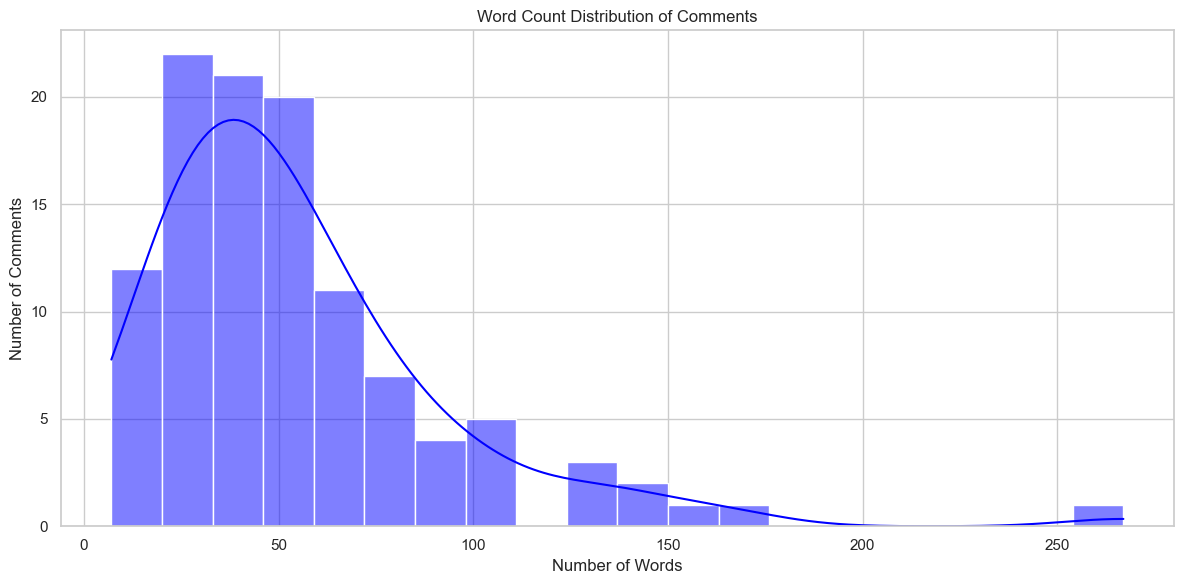

In [32]:
from utils.plot_words_distribution import plot_distribution_of_words

text_col = 'content'

# plot the distribution of words
plot_distribution_of_words(df_sum_3, text_col)

In [33]:
from utils.load_prompts import load_chosen_prompt
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments
from utils.load_pretrained_spacy_model import load_pretrained_model
from sklearn.model_selection import train_test_split

# load the final dataset and the language
df_sum_3, _ = load_pretrained_model(df=df_sum_3, text_col=text_col)

# load the prompt template
prompt_template = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The language of the dataset is: en
The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


### 1ST SUMMARIZATION TECHNIQUE: SEPARATE COMMENTS RANDOMLY INTO GROUPS

We are going to implement a simple technique by grouping the comments/reviews into groups randomly, create a summary for each group of comments and finally a final summarization based on the summaries of group of comments

In [34]:
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments

language = 'English'
topic = "Veterans' GI Bill payment delays"

# divide the comments into groups
groups_1 = divide_comments_by_time(df_sum_3, text_column='content')

#create the summaries
summaries_1 = create_summary_for_groups_of_comments(groups=groups_1, prompt=prompt_template, gpt_model='gpt-4o', language=language, topic=topic)

Comments do not contain timestamp. Continue the group by shuffle them.


  7%|████████▏                                                                                                                 | 1/15 [00:04<00:57,  4.10s/it]

The comments highlight several issues and developments related to the Veterans' GI Bill and its associated benefits. A veteran, Baker, shares personal challenges faced after leaving the military, including the emotional toll on his children due to his absence and financial stress from payment delays. The comments also discuss legislative changes, such as the transfer of benefits, allowing new dependents to be designated if the original dependent passes away. Additionally, there are updates regarding licensing and certification exams, with entitlement charges now prorated based on actual test fees. Despite efforts to streamline processes, delays in payments remain a significant issue, impacting veterans' financial stability. Furthermore, the law now includes provisions for reserve component benefits and aims to enhance priority enrollment systems, ensuring veterans and servicemembers can enroll early in courses where applicable. The new policies and adjustments predominantly aim to impr

 13%|████████████████▎                                                                                                         | 2/15 [00:08<00:52,  4.06s/it]

The comments shed light on ongoing issues and updates surrounding the Veterans' GI Bill payment delays. The U.S. Department of Veterans Affairs (VA) continues to grapple with a backlog of over 58,000 student aid claims, causing significant financial strain for veterans pursuing education. The lack of a permanent Chief Information Officer since 2017 exacerbates these challenges, as modernization and technology are critical for delivering benefits efficiently. There is a pressing need for long-term solutions to these systemic problems. Additionally, new legislative changes impact the Survivors' and Dependents' Educational Assistance program, reducing entitlement from 45 to 36 months for new enrollees post-August 2018. Communication gaps and inaction by the U.S. Senate further complicate these issues, contributing to financial difficulties faced by veterans and their families. Furthermore, the VA's inability to make retroactive payments without auditing past claims creates an additional r

 20%|████████████████████████▍                                                                                                 | 3/15 [00:12<00:47,  4.00s/it]

The comments shed light on the ongoing challenges veterans face due to GI Bill payment delays, affecting their financial obligations like tuition reimbursements and housing costs. A veteran, Baker, highlights the issue of having to repay his school after dropping classes, underscoring the financial burden caused by delayed payments. Efforts to prioritize post-9/11 GI Bill beneficiaries requiring the most credit hours and entitled to 100% benefits are noted, though processing future claims continues to face potential delays. The VA's Office of Information Technology struggles with implementing changes to housing allowance calculations, resulting in veterans receiving payments at the DoD rate temporarily, which might match or exceed the previous rates. Concerns are raised about the execution of legislative adjustments during busy academic periods, with VA Secretary Robert Wilkie announcing a temporary reset to refine technology and formulas to prioritize veterans. While the reset is welc

 27%|████████████████████████████████▌                                                                                         | 4/15 [00:15<00:42,  3.89s/it]

The comments highlight ongoing issues and legislative updates concerning Veterans' GI Bill payment delays. Many schools have implemented interest-free loans and tuition deferments to help student veterans cope with financial challenges while awaiting their benefits. Payment calculations for the monthly housing allowance under the Post-9/11 GI Bill are now based on the campus location where the student physically attends most of their classes, effective for enrollments beginning after August 1, 2018. Despite some veterans receiving back payments promptly, many individuals continue to experience significant delays, as seen at East Tennessee State University, where processing times varied from days to months. Efforts to address these challenges include a new pilot program aimed at training veterans in high-tech fields, starting 180 days after August 1, 2018. Additionally, adjustments have been made to the Survivors' and Dependents' Educational Assistance program, increasing monthly educat

 33%|████████████████████████████████████████▋                                                                                 | 5/15 [00:19<00:37,  3.71s/it]

Student veterans across the U.S. are facing delays and inaccuracies in GI Bill benefit payments, primarily attributed to outdated VA computer systems and contractual disputes. The VA's decision to base housing allowances on school zip codes rather than veteran residences added complexity, failing stress tests and leading to delayed communication with schools. The Forever GI Bill's housing allowance adjustment, initially scheduled, has been postponed to December 2019, with promises of retroactive payments to affected veterans. Meanwhile, new benefits target those in STEM fields, offering up to nine additional months of Post-9/11 GI Bill benefits for eligible participants nearing entitlement exhaustion. Legislative changes also count specific Reserve duty towards eligibility. At institutions like Middle Tennessee State University, support includes deferred tuition and short-term loans to assist veterans impacted by these delays. Overall, these developments highlight ongoing systemic issu

 40%|████████████████████████████████████████████████▊                                                                         | 6/15 [00:22<00:31,  3.47s/it]

The comments emphasize ongoing struggles with Veterans' GI Bill payment delays and the resulting financial hardships for veterans. Individuals face challenges such as affording basic necessities and continuing education amid delayed benefits. The U.S. Department of Veterans Affairs (VA) has been criticized for its inconsistent communication and management, prompting frustration among congressional aides and veterans alike. Benefits changes include the extension of monthly housing allowances following school closures, effective from August 2018. Despite some updates, like the work-study expansion without an expiration date and limitations on yellow ribbon payments, many veterans remain financially strained. Some veterans have experienced severe difficulties, especially first-time students who face more rigorous processes. Educational institutions like Middle Tennessee State University and the University of Memphis report frequent complaints regarding payment delays. These issues highlig

 47%|████████████████████████████████████████████████████████▉                                                                 | 7/15 [00:27<00:31,  3.93s/it]

The comments highlight ongoing challenges related to Veterans' GI Bill payment delays and recent developments aimed at addressing them. The VA is now authorized to restore benefits for education beneficiaries affected by school closures or disapprovals due to new laws or regulations. This measure prevents educational assistance from being deducted from their entitlement, providing relief to those unable to complete their programs. Meanwhile, a large-scale information-technology glitch has delayed financial aid this fall, impacting veterans and families who rely on these benefits for education expenses. The delay is attributed to an IT issue arising from changes in how aid is calculated. This situation has placed financial strain on families, like a communications major and his wife who are both full-time students with young children.

Furthermore, institutional funds at several schools have been depleted, raising budget concerns due to late or missing financial aid. The VA's reluctance

 53%|█████████████████████████████████████████████████████████████████                                                         | 8/15 [00:30<00:27,  3.91s/it]

The comments highlight recent updates and persisting challenges surrounding Veterans' GI Bill payment delays. Significant legislative changes include granting Purple Heart recipients full Post-9/11 GI Bill benefits for up to 36 months, effective from August 1, 2018. Congressional efforts to resolve system issues are ongoing, yet considerable challenges persist due to resource-intensive modernization needs, which Congress is hesitant to undertake. The unfortunate deaths of American soldiers underscore the imperative of honoring veterans with timely benefits. The "sit-rep" bill, designed to protect students affected by these delays, has passed the House unanimously but remains stalled in the Senate.

Amid these systemic delays, individual stories emerge of financial distress among student veterans, like those at Austin Peay State University, where over 2,400 military-affiliated students attend, with institutions responding by offering support. Efforts to enhance communication include ens

 60%|█████████████████████████████████████████████████████████████████████████▏                                                | 9/15 [00:34<00:23,  3.89s/it]

The comments reveal ongoing issues and recent developments concerning Veterans' GI Bill payment delays. Staff at veterans centers, such as at Middle Tennessee State University, proactively informed students about possible delays and trained staff accordingly. However, the VA has indicated that it will not issue retroactive payments to those underpaid due to housing miscalculations. Despite expanding benefits for more veterans, the Forever GI Bill failed to improve the VA's outdated technical infrastructure, contributing to these problems. The VA has postponed adjustments to housing allowances, continuing with older Department of Defense rates until spring 2020. Positive progress includes the resolution of major issues by the end of the term at the University of Tennessee, Knoxville, where no problems were reported for their veteran students. Differences in housing allowances persist, as individuals who began using the Post-9/11 GI Bill after January 1, 2018, receive reduced rates, whil

 67%|████████████████████████████████████████████████████████████████████████████████▋                                        | 10/15 [00:37<00:17,  3.53s/it]

Recent comments on Veterans' GI Bill payment delays highlight ongoing issues attributed to technology failures and policy changes. Tennessee legislators have urged immediate action from Congress to address these delays affecting student veterans. The backlog stems from difficulties in updating VA systems to accommodate housing allowance calculations introduced by the Forever GI Bill, signed into law in 2017. Many veterans, like those at Austin Peay State University, continue to experience delayed or missing benefits. Although the VA announced that students who were overpaid due to these changes will not incur debt, confusion persists regarding the underpayment of others, with the extent of the financial shortfall still unclear. Furthermore, legislative provisions now allow the VA to reinstate benefits for certain discontinued courses, providing some relief. These developments stress the urgent need for VA system improvements and clearer communication to ensure veterans' educational ben

 73%|████████████████████████████████████████████████████████████████████████████████████████▋                                | 11/15 [00:40<00:13,  3.41s/it]

The comments address continued delays in Veterans' GI Bill payments and related challenges. The Senate has yet to confirm a qualified nominee for a key VA position, hindering progress. VA officials previously promised to reimburse underpaid veterans but have not yet fulfilled this commitment, leading to frustration. Implementing corrective measures would impose significant administrative burdens on schools, as they would need to revise numerous enrollment documents. Advocacy groups emphasize the urgent need for legislative action to resolve these issues, with the Veterans Education Success organization highlighting the timely necessity of passing related bills. Universities, including Middle Tennessee State University, are providing interim support for affected students to ensure educational continuity. However, challenges remain, as many students still face difficulties due to payment delays. While some efforts focus on maintaining students' educational paths, the complexities of tran

 80%|████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 12/15 [00:47<00:13,  4.43s/it]

The comments reflect ongoing challenges and recent changes related to Veterans' GI Bill payment delays. New provisions now allow veterans to utilize their Post-9/11 educational assistance at technical schools and independent study programs, expanding opportunities beyond traditional institutions of higher learning. However, IT system inefficiencies persist, with fixes postponed until December 2019, well beyond initial deadlines. This ongoing issue has prompted calls for immediate congressional intervention, particularly to pass legislation preventing schools from penalizing veterans for late VA payments—a significant concern for those unable to register for future courses.

The antiquated IT infrastructure of the VA is highlighted as a core problem, underscored by a 2016 Government Accountability Office report indicating the age and outdated nature of these systems. The failure to modernize these systems impacts not only timely benefit delivery but also the VA's ability to handle incre

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 13/15 [00:52<00:09,  4.54s/it]

Recent comments on the Veterans' GI Bill payment delays underscore ongoing issues resulting from both administrative decisions and technical shortcomings. Despite assurances, the Department of Veterans Affairs (VA) has confirmed that it will not reimburse veterans underpaid after the implementation of the Forever GI Bill in 2017, igniting widespread frustration. Students report difficulties covering educational expenses like textbooks, impacting their academic performance, with institutions stepping in to mitigate these financial strains where possible.

Many veterans across the United States continue to experience payment delays, stemming from a system backlog following new legislation. This unforeseen situation has left veterans, like those in Tennessee, uncertain and financially strained. Prominent lawmakers, including Senate Committee Chairman Johnny Isakson and Rep. Phil Roe, have expressed disappointment over the VA's ineffective IT systems. They stress that timely and accurate p

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 14/15 [00:54<00:03,  3.99s/it]

Recent comments on Veterans' GI Bill payment delays highlight persistent issues with benefit distribution and recent changes in eligibility. Despite Vanderbilt University reporting no concerns from their students, other veterans experience significant financial challenges due to delayed payments. For instance, a veteran expressed anxiety over financial stability, needing to find work while his spouse took on a second job to cover mortgage expenses due to the VA's payment delays. New legislative updates include extending the Yellow Ribbon Program to active-duty service members effective August 2022, and earlier to Fry and Purple Heart recipients from August 2018, which aim to broaden benefit access. Additionally, the elimination of the 15-year limitation for utilizing the Post-9/11 GI Bill benefits for certain individuals marks an important development. However, issues such as loss of training time and program credit continue to concern veterans, underscoring the need for prompt and eff

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:58<00:00,  3.90s/it]

Recent comments on Veterans' GI Bill payment delays highlight the continued role universities play in supporting affected students, where the VA has faced challenges. Institutions like Vanderbilt University have preemptively managed regulatory changes by submitting benefit claims early, sparing their relatively small veteran student populations from significant disruptions. However, the delays have resulted in a backlog, particularly impacting post-Sept. 11 military-affiliated students, including many first-time students, as they commence their academic year. Nationally, there are thousands of pending claims, with fewer than 1,000 over 60 days old as of late November. A significant policy change effective August 2019 enables dependents who received entitlement transfers under the Post-9/11 GI Bill to further transfer these benefits to another eligible dependent if the servicemember or veteran who authorized the transfer dies. These insights underscore the importance of timely claim pro

In [35]:
# load the prompt template
prompt_template_final_1 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The number of arguments to contain in the prompt are: 2
The required arguments are: ['topic', 'summaries']


#### FINAL SUMMARY BASED ON SUMMARIES OF COMMENTS

In [36]:
from summarization_methods.divide_comments_and_summarize import final_summary_of_divided_comments
topic = "Veterans' GI Bill payment delays"

#create the summaries
final_summary_1 = final_summary_of_divided_comments(prompt=prompt_template_final_1, gpt_model='gpt-4o', topic=topic, summaries=summaries_1)

The recent discussion surrounding Veterans' GI Bill payment delays highlights several key issues and legislative developments. One of the main challenges is the financial instability faced by veterans due to payment delays, exacerbated by outdated VA computer systems and communication gaps. Many veterans struggle with tuition reimbursements and housing costs, causing significant strain. Despite recent legislative efforts, such as adjustments to housing allowances and expanded eligibility for benefits, systemic issues persist within the VA, requiring modernization and improved management.

Schools across the U.S. are implementing support mechanisms, like deferred tuition and interest-free loans, for affected students. However, VA communication remains inconsistent, adding to the confusion and financial pressure on veterans. Legislative changes have been introduced, such as the extension of support to STEM fields and enhanced benefits for Purple Heart recipients, aiming to expand educati

### 2ND SUMMARIZATION TECHNIQUE: CLASSIFY COMMENTS BASED ON LABELS AND SUMMARY THE LABELS

We are going to implement more complicated technique, in which we are going to classify comments based on some labels that we are going to define. For each label for are going to create summaries and finally a final summary based on these summaries

In [37]:
from summarization_methods.classification_of_comments_and_summarization import classify_comments

df_sum_3 = classify_comments(df=df_sum_3, text_col='content', prompt_name='prompt_for_classification_QMSUM', gpt_model='gpt-4o')

  1%|█                                                                                                                        | 1/110 [00:00<01:15,  1.44it/s]

'2'
Chosen label from GPT model is: 2


  2%|██▏                                                                                                                      | 2/110 [00:01<01:09,  1.54it/s]

'2'
Chosen label from GPT model is: 2


  3%|███▎                                                                                                                     | 3/110 [00:01<01:07,  1.58it/s]

'2'
Chosen label from GPT model is: 2


  4%|████▍                                                                                                                    | 4/110 [00:03<01:32,  1.15it/s]

'2'
Chosen label from GPT model is: 2


  5%|█████▌                                                                                                                   | 5/110 [00:03<01:24,  1.24it/s]

'1'
Chosen label from GPT model is: 1


  5%|██████▌                                                                                                                  | 6/110 [00:04<01:22,  1.26it/s]

'1'
Chosen label from GPT model is: 1


  6%|███████▋                                                                                                                 | 7/110 [00:05<01:17,  1.33it/s]

'2'
Chosen label from GPT model is: 2


  7%|████████▊                                                                                                                | 8/110 [00:05<01:13,  1.39it/s]

'2'
Chosen label from GPT model is: 2


  8%|█████████▉                                                                                                               | 9/110 [00:06<01:10,  1.43it/s]

'2'
Chosen label from GPT model is: 2


  9%|██████████▉                                                                                                             | 10/110 [00:07<01:07,  1.48it/s]

'2'
Chosen label from GPT model is: 2


 10%|████████████                                                                                                            | 11/110 [00:07<01:07,  1.47it/s]

'2'
Chosen label from GPT model is: 2


 11%|█████████████                                                                                                           | 12/110 [00:09<01:22,  1.18it/s]

'2'
Chosen label from GPT model is: 2


 12%|██████████████▏                                                                                                         | 13/110 [00:10<01:26,  1.12it/s]

'2'
Chosen label from GPT model is: 2


 13%|███████████████▎                                                                                                        | 14/110 [00:10<01:19,  1.21it/s]

'1'
Chosen label from GPT model is: 1


 14%|████████████████▎                                                                                                       | 15/110 [00:11<01:14,  1.28it/s]

'2'
Chosen label from GPT model is: 2


 15%|█████████████████▍                                                                                                      | 16/110 [00:12<01:10,  1.34it/s]

'1'
Chosen label from GPT model is: 1


 15%|██████████████████▌                                                                                                     | 17/110 [00:12<01:07,  1.38it/s]

2
Chosen label from GPT model is: 2


 16%|███████████████████▋                                                                                                    | 18/110 [00:13<01:05,  1.40it/s]

'2'
Chosen label from GPT model is: 2


 17%|████████████████████▋                                                                                                   | 19/110 [00:14<01:04,  1.42it/s]

'1'
Chosen label from GPT model is: 1


 18%|█████████████████████▊                                                                                                  | 20/110 [00:14<01:02,  1.45it/s]

'2'
Chosen label from GPT model is: 2


 19%|██████████████████████▉                                                                                                 | 21/110 [00:15<01:02,  1.42it/s]

'2'
Chosen label from GPT model is: 2


 20%|████████████████████████                                                                                                | 22/110 [00:16<01:01,  1.43it/s]

'2'
Chosen label from GPT model is: 2


 21%|█████████████████████████                                                                                               | 23/110 [00:16<00:59,  1.47it/s]

'2'
Chosen label from GPT model is: 2


 22%|██████████████████████████▏                                                                                             | 24/110 [00:17<00:58,  1.46it/s]

'2'
Chosen label from GPT model is: 2


 23%|███████████████████████████▎                                                                                            | 25/110 [00:18<00:58,  1.46it/s]

'2'
Chosen label from GPT model is: 2


 24%|████████████████████████████▎                                                                                           | 26/110 [00:19<00:58,  1.43it/s]

'2'
Chosen label from GPT model is: 2


 25%|█████████████████████████████▍                                                                                          | 27/110 [00:19<01:00,  1.38it/s]

'1'
Chosen label from GPT model is: 1


 25%|██████████████████████████████▌                                                                                         | 28/110 [00:20<00:57,  1.42it/s]

'2'
Chosen label from GPT model is: 2


 26%|███████████████████████████████▋                                                                                        | 29/110 [00:21<00:56,  1.43it/s]

'2'
Chosen label from GPT model is: 2


 27%|████████████████████████████████▋                                                                                       | 30/110 [00:21<00:55,  1.43it/s]

'1'
Chosen label from GPT model is: 1


 28%|█████████████████████████████████▊                                                                                      | 31/110 [00:22<00:53,  1.47it/s]

2
Chosen label from GPT model is: 2


 29%|██████████████████████████████████▉                                                                                     | 32/110 [00:23<00:51,  1.50it/s]

'2'
Chosen label from GPT model is: 2


 30%|████████████████████████████████████                                                                                    | 33/110 [00:23<00:51,  1.48it/s]

'1'
Chosen label from GPT model is: 1


 31%|█████████████████████████████████████                                                                                   | 34/110 [00:24<00:51,  1.49it/s]

'2'
Chosen label from GPT model is: 2


 32%|██████████████████████████████████████▏                                                                                 | 35/110 [00:25<00:51,  1.46it/s]

'2'
Chosen label from GPT model is: 2


 33%|███████████████████████████████████████▎                                                                                | 36/110 [00:25<00:50,  1.46it/s]

'2'
Chosen label from GPT model is: 2


 34%|████████████████████████████████████████▎                                                                               | 37/110 [00:28<01:29,  1.22s/it]

'2'
Chosen label from GPT model is: 2


 35%|█████████████████████████████████████████▍                                                                              | 38/110 [00:29<01:18,  1.09s/it]

'2'
Chosen label from GPT model is: 2


 35%|██████████████████████████████████████████▌                                                                             | 39/110 [00:29<01:08,  1.04it/s]

'2'
Chosen label from GPT model is: 2


 36%|███████████████████████████████████████████▋                                                                            | 40/110 [00:30<01:02,  1.12it/s]

'2'
Chosen label from GPT model is: 2


 37%|████████████████████████████████████████████▋                                                                           | 41/110 [00:32<01:15,  1.10s/it]

'2'
Chosen label from GPT model is: 2


 38%|█████████████████████████████████████████████▊                                                                          | 42/110 [00:32<01:06,  1.02it/s]

'1'
Chosen label from GPT model is: 1


 39%|██████████████████████████████████████████████▉                                                                         | 43/110 [00:33<00:59,  1.14it/s]

'1'
Chosen label from GPT model is: 1


 40%|████████████████████████████████████████████████                                                                        | 44/110 [00:34<01:00,  1.09it/s]

'0'
Chosen label from GPT model is: 0


 41%|█████████████████████████████████████████████████                                                                       | 45/110 [00:35<00:56,  1.15it/s]

1
Chosen label from GPT model is: 1


 42%|██████████████████████████████████████████████████▏                                                                     | 46/110 [00:35<00:53,  1.19it/s]

'2'
Chosen label from GPT model is: 2


 43%|███████████████████████████████████████████████████▎                                                                    | 47/110 [00:36<00:50,  1.26it/s]

'1'
Chosen label from GPT model is: 1


 44%|████████████████████████████████████████████████████▎                                                                   | 48/110 [00:37<00:47,  1.31it/s]

'2'
Chosen label from GPT model is: 2


 45%|█████████████████████████████████████████████████████▍                                                                  | 49/110 [00:39<01:15,  1.24s/it]

'1'
Chosen label from GPT model is: 1


 45%|██████████████████████████████████████████████████████▌                                                                 | 50/110 [00:41<01:20,  1.34s/it]

1
Chosen label from GPT model is: 1


 46%|███████████████████████████████████████████████████████▋                                                                | 51/110 [00:42<01:07,  1.15s/it]

'2'
Chosen label from GPT model is: 2


 47%|████████████████████████████████████████████████████████▋                                                               | 52/110 [00:42<00:57,  1.00it/s]

'1'
Chosen label from GPT model is: 1


 48%|█████████████████████████████████████████████████████████▊                                                              | 53/110 [00:44<01:18,  1.38s/it]

'1'
Chosen label from GPT model is: 1


 49%|██████████████████████████████████████████████████████████▉                                                             | 54/110 [00:45<01:06,  1.19s/it]

'2'
Chosen label from GPT model is: 2


 50%|████████████████████████████████████████████████████████████                                                            | 55/110 [00:46<00:57,  1.05s/it]

'2'
Chosen label from GPT model is: 2


 51%|█████████████████████████████████████████████████████████████                                                           | 56/110 [00:48<01:14,  1.39s/it]

'2'
Chosen label from GPT model is: 2


 52%|██████████████████████████████████████████████████████████████▏                                                         | 57/110 [00:50<01:27,  1.65s/it]

'2'
Chosen label from GPT model is: 2


 53%|███████████████████████████████████████████████████████████████▎                                                        | 58/110 [00:51<01:11,  1.37s/it]

'2'
Chosen label from GPT model is: 2


 54%|████████████████████████████████████████████████████████████████▎                                                       | 59/110 [00:52<00:59,  1.17s/it]

'2'
Chosen label from GPT model is: 2


 55%|█████████████████████████████████████████████████████████████████▍                                                      | 60/110 [00:54<01:14,  1.49s/it]

'2'
Chosen label from GPT model is: 2


 55%|██████████████████████████████████████████████████████████████████▌                                                     | 61/110 [00:55<01:00,  1.23s/it]

'1'
Chosen label from GPT model is: 1


 56%|███████████████████████████████████████████████████████████████████▋                                                    | 62/110 [00:55<00:52,  1.10s/it]

'1'
Chosen label from GPT model is: 1


 57%|████████████████████████████████████████████████████████████████████▋                                                   | 63/110 [00:56<00:46,  1.02it/s]

'1'
Chosen label from GPT model is: 1


 58%|█████████████████████████████████████████████████████████████████████▊                                                  | 64/110 [00:57<00:44,  1.03it/s]

'1'
Chosen label from GPT model is: 1


 59%|██████████████████████████████████████████████████████████████████████▉                                                 | 65/110 [00:58<00:39,  1.14it/s]

'2'
Chosen label from GPT model is: 2


 60%|████████████████████████████████████████████████████████████████████████                                                | 66/110 [00:58<00:35,  1.23it/s]

'2'
Chosen label from GPT model is: 2


 61%|█████████████████████████████████████████████████████████████████████████                                               | 67/110 [00:59<00:32,  1.30it/s]

'2'
Chosen label from GPT model is: 2


 62%|██████████████████████████████████████████████████████████████████████████▏                                             | 68/110 [01:00<00:31,  1.33it/s]

'0'
Chosen label from GPT model is: 0


 63%|███████████████████████████████████████████████████████████████████████████▎                                            | 69/110 [01:00<00:29,  1.38it/s]

1
Chosen label from GPT model is: 1


 64%|████████████████████████████████████████████████████████████████████████████▎                                           | 70/110 [01:01<00:28,  1.40it/s]

'2'
Chosen label from GPT model is: 2


 65%|█████████████████████████████████████████████████████████████████████████████▍                                          | 71/110 [01:02<00:27,  1.44it/s]

'1'
Chosen label from GPT model is: 1


 65%|██████████████████████████████████████████████████████████████████████████████▌                                         | 72/110 [01:02<00:25,  1.49it/s]

1
Chosen label from GPT model is: 1


 66%|███████████████████████████████████████████████████████████████████████████████▋                                        | 73/110 [01:05<00:42,  1.16s/it]

'1'
Chosen label from GPT model is: 1


 67%|████████████████████████████████████████████████████████████████████████████████▋                                       | 74/110 [01:06<00:45,  1.27s/it]

'1'
Chosen label from GPT model is: 1


 68%|█████████████████████████████████████████████████████████████████████████████████▊                                      | 75/110 [01:07<00:38,  1.11s/it]

'1'
Chosen label from GPT model is: 1


 69%|██████████████████████████████████████████████████████████████████████████████████▉                                     | 76/110 [01:08<00:33,  1.02it/s]

'1'
Chosen label from GPT model is: 1


 70%|████████████████████████████████████████████████████████████████████████████████████                                    | 77/110 [01:08<00:29,  1.12it/s]

'1'
Chosen label from GPT model is: 1


 71%|█████████████████████████████████████████████████████████████████████████████████████                                   | 78/110 [01:09<00:27,  1.17it/s]

'1'
Chosen label from GPT model is: 1


 72%|██████████████████████████████████████████████████████████████████████████████████████▏                                 | 79/110 [01:10<00:24,  1.27it/s]

'1'
Chosen label from GPT model is: 1


 73%|███████████████████████████████████████████████████████████████████████████████████████▎                                | 80/110 [01:10<00:22,  1.31it/s]

'1'
Chosen label from GPT model is: 1


 74%|████████████████████████████████████████████████████████████████████████████████████████▎                               | 81/110 [01:11<00:21,  1.37it/s]

'1'
Chosen label from GPT model is: 1


 75%|█████████████████████████████████████████████████████████████████████████████████████████▍                              | 82/110 [01:12<00:20,  1.39it/s]

'2'
Chosen label from GPT model is: 2


 75%|██████████████████████████████████████████████████████████████████████████████████████████▌                             | 83/110 [01:12<00:19,  1.41it/s]

'1'
Chosen label from GPT model is: 1


 76%|███████████████████████████████████████████████████████████████████████████████████████████▋                            | 84/110 [01:13<00:17,  1.45it/s]

'1'
Chosen label from GPT model is: 1


 77%|████████████████████████████████████████████████████████████████████████████████████████████▋                           | 85/110 [01:14<00:17,  1.46it/s]

'1'
Chosen label from GPT model is: 1


 78%|█████████████████████████████████████████████████████████████████████████████████████████████▊                          | 86/110 [01:15<00:16,  1.41it/s]

'1'
Chosen label from GPT model is: 1


 79%|██████████████████████████████████████████████████████████████████████████████████████████████▉                         | 87/110 [01:15<00:16,  1.42it/s]

'1'
Chosen label from GPT model is: 1


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 88/110 [01:16<00:15,  1.46it/s]

'1'
Chosen label from GPT model is: 1


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████                       | 89/110 [01:17<00:14,  1.43it/s]

'0'
Chosen label from GPT model is: 0


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 90/110 [01:17<00:13,  1.46it/s]

'1'
Chosen label from GPT model is: 1


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 91/110 [01:18<00:12,  1.47it/s]

'1'
Chosen label from GPT model is: 1


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 92/110 [01:19<00:12,  1.48it/s]

'1'
Chosen label from GPT model is: 1


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 93/110 [01:19<00:11,  1.52it/s]

'1'
Chosen label from GPT model is: 1


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 94/110 [01:20<00:10,  1.50it/s]

'1'
Chosen label from GPT model is: 1


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 95/110 [01:21<00:09,  1.52it/s]

'2'
Chosen label from GPT model is: 2


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 96/110 [01:21<00:09,  1.49it/s]

'1'
Chosen label from GPT model is: 1


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 97/110 [01:22<00:08,  1.50it/s]

'1'
Chosen label from GPT model is: 1


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 98/110 [01:23<00:08,  1.49it/s]

'1'
Chosen label from GPT model is: 1


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 99/110 [01:23<00:07,  1.52it/s]

'1'
Chosen label from GPT model is: 1


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 100/110 [01:24<00:06,  1.51it/s]

'1'
Chosen label from GPT model is: 1


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 101/110 [01:25<00:06,  1.43it/s]

'1'
Chosen label from GPT model is: 1


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 102/110 [01:25<00:05,  1.45it/s]

'1'
Chosen label from GPT model is: 1


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 103/110 [01:26<00:04,  1.45it/s]

'2'
Chosen label from GPT model is: 2


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 104/110 [01:27<00:04,  1.49it/s]

'1'
Chosen label from GPT model is: 1


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 105/110 [01:27<00:03,  1.49it/s]

'1'
Chosen label from GPT model is: 1


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 106/110 [01:28<00:02,  1.51it/s]

'1'
Chosen label from GPT model is: 1


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 107/110 [01:29<00:02,  1.44it/s]

'1'
Chosen label from GPT model is: 1


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 108/110 [01:29<00:01,  1.48it/s]

'1'
Chosen label from GPT model is: 1


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 109/110 [01:30<00:00,  1.44it/s]

'1'
Chosen label from GPT model is: 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [01:31<00:00,  1.21it/s]

'1'
Chosen label from GPT model is: 1


In [38]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_2 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [39]:
from summarization_methods.classification_of_comments_and_summarization import summarize_comments_by_label

text_col = 'content'
language = 'English'
topic = "Veterans' GI Bill payment delays"

# produce the summaries for grouped comments by label
summaries_2 = summarize_comments_by_label(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_2, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_2 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The discussion around the GI Bill payment delays highlights several critical issues impacting veterans. Firstly, there are significant technology-related challenges within the VA that have led to financial aid delays, causing distress among veterans relying on these payments for educational expenses. Updates to legislation, particularly concerning housing allowances, have not been implemented efficiently, further exacerbating the problem. Various testimonies indicate that these administrative hurdles have led to financial hardships, pushing some students to consider halting their education. The delays have resulted in a backlog of claims, with VA officials admitting to further potential delays into the new year. Additionally, the lack of transparency and accountability from the VA in addressing these delays has raised concerns among congressional staff and the public, with many calling for a thorough review and better oversight from the government. Veterans and educational institutions

In [40]:
from summarization_methods.classification_of_comments_and_summarization import final_summary_of_labeled_comments

# produce the final summary for the 2nd technique
final_summary_2 = final_summary_of_labeled_comments(prompt=prompt_template_final_2, gpt_model='gpt-4o', topic=topic, summaries=summaries_2)

The discussion on Veterans' GI Bill payment delays highlights critical issues affecting veterans' financial security and education. There are significant technology-related challenges within the VA that have led to delays in financial aid, exacerbating financial hardships and causing distress among veterans. Updates to legislation, particularly concerning housing allowances, have been inefficiently implemented, leading to a backlog of claims and financial uncertainties. Despite efforts by the House of Representatives and universities, such as offering grace periods and deferred tuition, the VA's administrative and technical issues persist. The VA has acknowledged these problems and suspended certain benefit processing updates, with proposed enhancements in the GI Bill structure and additional legislative amendments aiming to expand benefits. However, veterans and advocates demand increased transparency, accountability, and timely interventions from the VA to prevent further disruption.

### 3RD SUMMARIZATION TECHNIQUE: CLUSTER COMMENTS AND SUMMARY THE CLUSTERS

We are going to implement our 3rd technique. Initially, we are going to cluster the comments with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:44<00:00,  2.49it/s]


Using PCA to transformed embeddings


 43%|███████████████████████████████████████████████████▊                                                                     | 21/49 [00:02<00:02,  9.52it/s]


The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 2


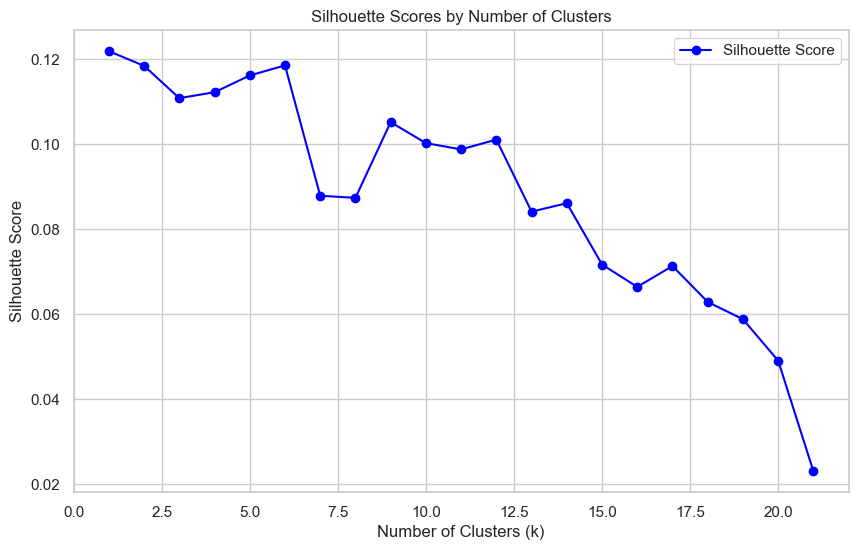

Silhouette score for best kappa: 0.144


In [41]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

text_col='content'

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_sum_3, kmeans_results = calc_clusters_with_kmeans(df=df_sum_3, text_col=text_col, max_token_length=1000, is_pca=(True, 16))

In [42]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_3 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [43]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col = 'content'
language = 'English'
topic = "Veterans' GI Bill payment delays"

# produce the summaries for grouped comments by label
summaries_3 =summarize_comments_by_cluster(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_3, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_3 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 1
The comments highlight ongoing issues surrounding delays in GI Bill payments for veterans. Many veterans face financial hardships due to the late disbursement of education benefits, impacting their ability to pay for essentials such as rent, tuition, and books. There is widespread frustration with the U.S. Department of Veterans Affairs (VA) for not addressing the systemic delays that keep recurring despite previous assurances. Some comments note that recent legislative efforts, such as a unanimously passed bill in the House, aim to mitigate these issues by demanding more transparency and accountability from the VA. Veterans express mixed feelings of hope and skepticism about these measures, citing past experiences where resolutions were promised but unmet. Individual stories reveal the personal toll of these delays, with veterans expressing anxiety over continued enrollment and the potential loss of educational opportunities. The VA's recent announcements 

In [44]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 3rd technique
final_summary_3 = final_summary_of_clustered_comments(prompt=prompt_template_final_3, gpt_model='gpt-4o', topic=topic, summaries=summaries_3)

The discussions on Veterans' GI Bill payment delays reveal significant challenges and frustrations among veterans affected by late disbursements of education benefits. These delays have profound financial implications, impacting veterans’ ability to afford critical expenses like rent and tuition, and have led to increasing dissatisfaction with the Department of Veterans Affairs (VA) due to recurring systemic issues. Legislative measures aimed at increasing VA transparency and accountability have been met with mixed reactions, combining hope with skepticism based on past unmet promises. Personal stories underscore the anxiety and educational disruptions caused by these payment delays. In response, the VA has announced initiatives such as IT upgrades and promised back payments, although their effectiveness and timeliness remain in question. Concurrently, recent updates to the GI Bill include expanded benefits for veterans and their families, such as enhancements to the Yellow Ribbon Prog

### 4TH SUMMARIZATION TECHNIQUE: TOPICS EXTRACTION OF COMMENTS, CLUSTER TOPICS AND SUMMARY THE CLUSTERS

We are going to implement our final technique in which we hope to be the best. Initially, we are going to extract topics for each comment/review. Moreover, we are going to cluster them with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

In [45]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_topics = load_chosen_prompt(prompt_name='prompt_for_topic_extraction')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['topic', 'language', 'topics', 'comment']


In [46]:
from summarization_methods.topic_extraction_clustering_and_summarization import topic_extraction

topic = "Veterans' GI Bill payment delays"
language = 'English'

# extract topics using llm's (openai gpt-4o)
df_sum_3, df_topics_3 = topic_extraction(df=df_sum_3, text_col='content', prompt_template=prompt_template_topics, gpt_model='gpt-4o', topic=topic, language=language)

print('--------------------------------------------------------------------------------------------------------------------------------')
print(f'The length of the topics that produced are: {len(df_topics_3)}')
print(f'The columns of the new dataframe are: {df_topics_3.columns}')

  1%|█                                                                                                                        | 1/110 [00:00<01:38,  1.11it/s]

extracted topics: ["Veterans' education benefits", "GI Bill payment delays", "Military service sacrifices"]


  2%|██▏                                                                                                                      | 2/110 [00:01<01:28,  1.22it/s]

extracted topics: ["GI Bill payment delays", "Veterans' education benefits", "Information-technology glitch"]


  3%|███▎                                                                                                                     | 3/110 [00:02<01:40,  1.07it/s]

extracted topics: ["GI Bill payment delays", "Lack of communication by the agency", "Inaction by the U.S. Senate", "Financial hardships for service members-turned-students", "Processing of student aid claims"]


  4%|████▍                                                                                                                    | 4/110 [00:03<01:51,  1.05s/it]

extracted topics: ["Information-technology glitch", "GI Bill payment delays", "Inaction by the U.S. Senate", "Processing of student aid claims", "Financial hardships for service members-turned-students"]


  5%|█████▌                                                                                                                   | 5/110 [00:05<01:52,  1.07s/it]

extracted topics: ["Inaction by the U.S. Senate", "Veterans' education benefits"]


  5%|██████▌                                                                                                                  | 6/110 [00:05<01:42,  1.01it/s]

extracted topics: ["Veterans' education benefits", 'Inaction by the U.S. Senate']


  6%|███████▋                                                                                                                 | 7/110 [00:06<01:38,  1.04it/s]

extracted topics: ["Inaction by the U.S. Senate", "Information-technology glitch", "Veterans' education benefits"]


  7%|████████▊                                                                                                                | 8/110 [00:07<01:31,  1.11it/s]

extracted topics: ['Inaction by the U.S. Senate']


  8%|█████████▉                                                                                                               | 9/110 [00:08<01:30,  1.11it/s]

extracted topics: ['Information-technology glitch', 'Inaction by the U.S. Senate', 'GI Bill payment delays']


  9%|██████████▉                                                                                                             | 10/110 [00:09<01:30,  1.11it/s]

extracted topics: ["GI Bill payment delays", "Information-technology glitch", "Inaction by the U.S. Senate"]


 10%|████████████                                                                                                            | 11/110 [00:10<01:28,  1.12it/s]

extracted topics: ['GI Bill payment delays', 'Information-technology glitch']


 11%|█████████████                                                                                                           | 12/110 [00:11<01:26,  1.14it/s]

extracted topics: ['GI Bill payment delays', 'Inaction by the U.S. Senate', "Veterans' education benefits"]


 12%|██████████████▏                                                                                                         | 13/110 [00:11<01:22,  1.18it/s]

extracted topics: ["GI Bill payment delays", "Lack of communication by the agency"]


 13%|███████████████▎                                                                                                        | 14/110 [00:12<01:18,  1.23it/s]

extracted topics: ["GI Bill payment delays", "Processing of student aid claims"]


 14%|████████████████▎                                                                                                       | 15/110 [00:13<01:26,  1.09it/s]

extracted topics: ["Financial hardships for service members-turned-students", "Information-technology glitch", "GI Bill payment delays"]


 15%|█████████████████▍                                                                                                      | 16/110 [00:14<01:21,  1.16it/s]

extracted topics: ["GI Bill payment delays", "Information-technology glitch"]


 15%|██████████████████▌                                                                                                     | 17/110 [00:15<01:19,  1.17it/s]

extracted topics: ["Information-technology glitch", "GI Bill payment delays", "Lack of communication by the agency"]


 16%|███████████████████▋                                                                                                    | 18/110 [00:16<01:16,  1.21it/s]

extracted topics: ["Inaction by the U.S. Senate"]


 17%|████████████████████▋                                                                                                   | 19/110 [00:16<01:15,  1.20it/s]

extracted topics: ["Processing of student aid claims", "Inaction by the VA", "Retroactive payments audit"]


 18%|█████████████████████▊                                                                                                  | 20/110 [00:17<01:12,  1.24it/s]

extracted topics: ["Processing of student aid claims", "GI Bill payment delays"]


 19%|██████████████████████▉                                                                                                 | 21/110 [00:18<01:12,  1.23it/s]

extracted topics: ["Inaction by the VA", "GI Bill payment delays", "Veterans' education benefits"]


 20%|████████████████████████                                                                                                | 22/110 [00:19<01:08,  1.29it/s]

extracted topics: []


 21%|█████████████████████████                                                                                               | 23/110 [00:20<01:08,  1.28it/s]

extracted topics: ["GI Bill payment delays", "Lack of communication by the agency"]


 22%|██████████████████████████▏                                                                                             | 24/110 [00:20<01:08,  1.26it/s]

extracted topics: ["Retroactive payments audit", "GI Bill payment delays", "Processing of student aid claims"]


 23%|███████████████████████████▎                                                                                            | 25/110 [00:21<01:10,  1.20it/s]

extracted topics: ["GI Bill payment delays", "Lack of communication by the agency", "Confusion over payment discrepancies"]


 24%|████████████████████████████▎                                                                                           | 26/110 [00:22<01:07,  1.24it/s]

extracted topics: ["Lack of communication by the agency"]


 25%|█████████████████████████████▍                                                                                          | 27/110 [00:23<01:04,  1.28it/s]

extracted topics: ["Inaction by the U.S. Senate"]


 25%|██████████████████████████████▌                                                                                         | 28/110 [00:24<01:04,  1.28it/s]

extracted topics: ["GI Bill payment delays", "Information-technology glitch", "Lack of communication by the agency"]


 26%|███████████████████████████████▋                                                                                        | 29/110 [00:24<01:07,  1.20it/s]

extracted topics: ["Information-technology glitch", "GI Bill payment delays", "Backlog of claims for veterans", "Lack of communication by the agency"]


 27%|████████████████████████████████▋                                                                                       | 30/110 [00:25<01:10,  1.13it/s]

extracted topics: ["GI Bill payment delays", "Information-technology glitch", "Lack of communication by the agency", "Inaction by the VA"]


 28%|█████████████████████████████████▊                                                                                      | 31/110 [00:27<01:14,  1.06it/s]

extracted topics: ["Information-technology glitch", "GI Bill payment delays", "Inaction by the VA", "Lack of communication by the agency", "Backlog of claims for veterans", "Veterans' education benefits"]


 29%|██████████████████████████████████▉                                                                                     | 32/110 [00:27<01:09,  1.12it/s]

extracted topics: ["GI Bill payment delays", "Veterans' education benefits"]


 30%|████████████████████████████████████                                                                                    | 33/110 [00:28<01:03,  1.22it/s]

extracted topics: []


 31%|█████████████████████████████████████                                                                                   | 34/110 [00:29<01:00,  1.25it/s]

extracted topics: ["GI Bill payment delays", "Lack of communication by the agency"]


 32%|██████████████████████████████████████▏                                                                                 | 35/110 [00:29<00:56,  1.34it/s]

extracted topics: []


 33%|███████████████████████████████████████▎                                                                                | 36/110 [00:30<00:53,  1.37it/s]

extracted topics: ["GI Bill payment delays"]


 34%|████████████████████████████████████████▎                                                                               | 37/110 [00:31<00:56,  1.30it/s]

extracted topics: ["GI Bill payment delays", "Backlog of claims for veterans"]


 35%|█████████████████████████████████████████▍                                                                              | 38/110 [00:32<00:54,  1.32it/s]

extracted topics: ["Information-technology glitch", "Veterans' education benefits"]


 35%|██████████████████████████████████████████▌                                                                             | 39/110 [00:32<00:54,  1.29it/s]

extracted topics: ["Information-technology glitch", 'GI Bill payment delays']


 36%|███████████████████████████████████████████▋                                                                            | 40/110 [00:33<00:57,  1.21it/s]

extracted topics: ["GI Bill payment delays", "Information-technology glitch", "Lack of communication by the agency"]


 37%|████████████████████████████████████████████▋                                                                           | 41/110 [00:34<00:56,  1.21it/s]

extracted topics: ["Backlog of claims for veterans", "GI Bill payment delays", "Veterans' education benefits"]


 38%|█████████████████████████████████████████████▊                                                                          | 42/110 [00:35<00:54,  1.24it/s]

extracted topics: ["GI Bill payment delays", "Inaction by the VA"]


 39%|██████████████████████████████████████████████▉                                                                         | 43/110 [00:36<00:52,  1.29it/s]

extracted topics: ['Backlog of claims for veterans']


 40%|████████████████████████████████████████████████                                                                        | 44/110 [00:36<00:49,  1.32it/s]

extracted topics: ["Inaction by the VA"]


 41%|█████████████████████████████████████████████████                                                                       | 45/110 [00:37<00:49,  1.30it/s]

extracted topics: ["Veterans' education benefits"]


 42%|██████████████████████████████████████████████████▏                                                                     | 46/110 [00:38<00:50,  1.27it/s]

extracted topics: ["Budget concerns for schools", "Impact on education institutions", "GI Bill payment delays"]


 43%|███████████████████████████████████████████████████▎                                                                    | 47/110 [00:39<00:49,  1.27it/s]

extracted topics: ["Veterans' education benefits", "GI Bill payment delays"]


 44%|████████████████████████████████████████████████████▎                                                                   | 48/110 [00:40<00:51,  1.19it/s]

extracted topics: ["GI Bill payment delays", "Veterans' education benefits"]


 45%|█████████████████████████████████████████████████████▍                                                                  | 49/110 [00:40<00:49,  1.24it/s]

extracted topics: ['GI Bill payment delays', 'Impact on education institutions']


 45%|██████████████████████████████████████████████████████▌                                                                 | 50/110 [00:41<00:50,  1.19it/s]

extracted topics: ["GI Bill payment delays", "Inaction by the VA", "Impact on education institutions"]


 46%|███████████████████████████████████████████████████████▋                                                                | 51/110 [00:42<00:49,  1.19it/s]

extracted topics: ["GI Bill payment delays", "Veterans' education benefits"]


 47%|████████████████████████████████████████████████████████▋                                                               | 52/110 [00:43<00:49,  1.17it/s]

extracted topics: ["GI Bill payment delays", "Information-technology glitch", "Impact on education institutions"]


 48%|█████████████████████████████████████████████████████████▊                                                              | 53/110 [00:44<00:45,  1.26it/s]

extracted topics: ["GI Bill payment delays"]


 49%|██████████████████████████████████████████████████████████▉                                                             | 54/110 [00:45<00:44,  1.25it/s]

extracted topics: ["Impact on education institutions", "GI Bill payment delays"]


 50%|████████████████████████████████████████████████████████████                                                            | 55/110 [00:45<00:42,  1.28it/s]

extracted topics: ["GI Bill payment delays"]


 51%|█████████████████████████████████████████████████████████████                                                           | 56/110 [00:46<00:42,  1.27it/s]

extracted topics: ["GI Bill payment delays", "Inaction by the VA"]


 52%|██████████████████████████████████████████████████████████████▏                                                         | 57/110 [00:47<00:40,  1.32it/s]

extracted topics: ['Inaction by the VA']


 53%|███████████████████████████████████████████████████████████████▎                                                        | 58/110 [00:48<00:40,  1.29it/s]

extracted topics: ["GI Bill payment delays", "Veterans' education benefits"]


 54%|████████████████████████████████████████████████████████████████▎                                                       | 59/110 [00:49<00:43,  1.18it/s]

extracted topics: ["GI Bill payment delays", "Inaction by the VA", "Information-technology glitch", "Veterans' education benefits", "Impact on education institutions"]


 55%|█████████████████████████████████████████████████████████████████▍                                                      | 60/110 [00:50<00:47,  1.05it/s]

extracted topics: ['GI Bill payment delays', 'Inaction by the VA']


 55%|██████████████████████████████████████████████████████████████████▌                                                     | 61/110 [00:51<00:42,  1.17it/s]

extracted topics: []


 56%|███████████████████████████████████████████████████████████████████▋                                                    | 62/110 [00:51<00:39,  1.21it/s]

extracted topics: ["GI Bill payment delays", "Impact on education institutions"]


 57%|████████████████████████████████████████████████████████████████████▋                                                   | 63/110 [00:52<00:37,  1.24it/s]

extracted topics: ["Impact on education institutions", "Inaction by the VA"]


 58%|█████████████████████████████████████████████████████████████████████▊                                                  | 64/110 [00:53<00:35,  1.28it/s]

extracted topics: ["GI Bill payment delays", "Impact on education institutions"]


 59%|██████████████████████████████████████████████████████████████████████▉                                                 | 65/110 [00:53<00:34,  1.29it/s]

extracted topics: ["GI Bill payment delays", "Inaction by the VA"]


 60%|████████████████████████████████████████████████████████████████████████                                                | 66/110 [00:54<00:33,  1.32it/s]

extracted topics: ["GI Bill payment delays"]


 61%|█████████████████████████████████████████████████████████████████████████                                               | 67/110 [00:55<00:35,  1.23it/s]

extracted topics: ['GI Bill payment delays', 'Inaction by the VA', 'Impact on education institutions']


 62%|██████████████████████████████████████████████████████████████████████████▏                                             | 68/110 [00:56<00:31,  1.32it/s]

extracted topics: []


 63%|███████████████████████████████████████████████████████████████████████████▎                                            | 69/110 [00:57<00:31,  1.30it/s]

extracted topics: ['GI Bill payment delays', 'Veterans\' education benefits']


 64%|████████████████████████████████████████████████████████████████████████████▎                                           | 70/110 [00:57<00:31,  1.27it/s]

extracted topics: []


 65%|█████████████████████████████████████████████████████████████████████████████▍                                          | 71/110 [00:59<00:34,  1.14it/s]

extracted topics: []


 65%|██████████████████████████████████████████████████████████████████████████████▌                                         | 72/110 [00:59<00:31,  1.21it/s]

extracted topics: []


 66%|███████████████████████████████████████████████████████████████████████████████▋                                        | 73/110 [01:00<00:29,  1.26it/s]

extracted topics: []


 67%|████████████████████████████████████████████████████████████████████████████████▋                                       | 74/110 [01:01<00:28,  1.24it/s]

extracted topics: ["Veterans' education benefits"]


 68%|█████████████████████████████████████████████████████████████████████████████████▊                                      | 75/110 [01:02<00:27,  1.25it/s]

extracted topics: []


 69%|██████████████████████████████████████████████████████████████████████████████████▉                                     | 76/110 [01:02<00:26,  1.31it/s]

extracted topics: []


 70%|████████████████████████████████████████████████████████████████████████████████████                                    | 77/110 [01:03<00:24,  1.36it/s]

extracted topics: []


 71%|█████████████████████████████████████████████████████████████████████████████████████                                   | 78/110 [01:04<00:25,  1.26it/s]

extracted topics: ["GI Bill payment delays", "Veterans' education benefits"]


 72%|██████████████████████████████████████████████████████████████████████████████████████▏                                 | 79/110 [01:05<00:28,  1.09it/s]

extracted topics: ["GI Bill payment delays", "Veterans' education benefits"]


 73%|███████████████████████████████████████████████████████████████████████████████████████▎                                | 80/110 [01:06<00:26,  1.12it/s]

extracted topics: ["Veterans' education benefits"]


 74%|████████████████████████████████████████████████████████████████████████████████████████▎                               | 81/110 [01:07<00:24,  1.17it/s]

extracted topics: ["Impact on education institutions", "Veterans' education benefits"]


 75%|█████████████████████████████████████████████████████████████████████████████████████████▍                              | 82/110 [01:07<00:23,  1.22it/s]

extracted topics: ['Impact on education institutions']


 75%|██████████████████████████████████████████████████████████████████████████████████████████▌                             | 83/110 [01:08<00:20,  1.30it/s]

extracted topics: []


 76%|███████████████████████████████████████████████████████████████████████████████████████████▋                            | 84/110 [01:09<00:20,  1.29it/s]

extracted topics: ["GI Bill payment delays", "Veterans' education benefits"]


 77%|████████████████████████████████████████████████████████████████████████████████████████████▋                           | 85/110 [01:10<00:19,  1.26it/s]

extracted topics: ["Veterans' education benefits"]


 78%|█████████████████████████████████████████████████████████████████████████████████████████████▊                          | 86/110 [01:10<00:18,  1.31it/s]

extracted topics: ["Veterans' education benefits"]


 79%|██████████████████████████████████████████████████████████████████████████████████████████████▉                         | 87/110 [01:11<00:16,  1.41it/s]

extracted topics: []


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 88/110 [01:12<00:15,  1.43it/s]

extracted topics: []


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████                       | 89/110 [01:12<00:14,  1.44it/s]

extracted topics: ["Veterans' education benefits"]


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 90/110 [01:13<00:14,  1.39it/s]

extracted topics: ["Impact on education institutions", "Veterans' education benefits"]


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 91/110 [01:14<00:13,  1.46it/s]

extracted topics: []


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 92/110 [01:14<00:11,  1.51it/s]

extracted topics: []


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 93/110 [01:15<00:11,  1.48it/s]

extracted topics: ["Veterans' education benefits"]


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 94/110 [01:16<00:10,  1.49it/s]

extracted topics: ["GI Bill payment delays"]


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 95/110 [01:16<00:10,  1.48it/s]

extracted topics: ["Veterans' education benefits"]


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 96/110 [01:17<00:09,  1.53it/s]

extracted topics: []


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 97/110 [01:18<00:08,  1.48it/s]

extracted topics: ["Veterans' education benefits"]


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 98/110 [01:18<00:08,  1.41it/s]

extracted topics: ["Veterans' education benefits"]


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 99/110 [01:19<00:07,  1.43it/s]

extracted topics: ["Veterans' education benefits"]


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 100/110 [01:20<00:06,  1.45it/s]

extracted topics: []


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 101/110 [01:20<00:06,  1.46it/s]

extracted topics: ["Veterans' education benefits"]


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 102/110 [01:21<00:05,  1.46it/s]

extracted topics: ["Veterans' education benefits"]


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 103/110 [01:22<00:04,  1.41it/s]

extracted topics: ["Veterans' education benefits"]


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 104/110 [01:23<00:04,  1.41it/s]

extracted topics: ["Veterans' education benefits"]


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 105/110 [01:23<00:03,  1.34it/s]

extracted topics: ["Veterans' education benefits"]


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 106/110 [01:25<00:03,  1.10it/s]

extracted topics: ["Impact on education institutions", "Veterans' education benefits"]


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 107/110 [01:26<00:02,  1.16it/s]

extracted topics: ["Impact on education institutions", "Veterans' education benefits"]


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 108/110 [01:26<00:01,  1.14it/s]

extracted topics: ["GI Bill payment delays", "Veterans' education benefits"]


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 109/110 [01:27<00:00,  1.23it/s]

extracted topics: []


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [01:28<00:00,  1.24it/s]

extracted topics: ["GI Bill payment delays", "Veterans' education benefits"]
--------------------------------------------------------------------------------------------------------------------------------
The length of the topics that produced are: 187
The columns of the new dataframe are: Index(['comment', 'topics'], dtype='object')


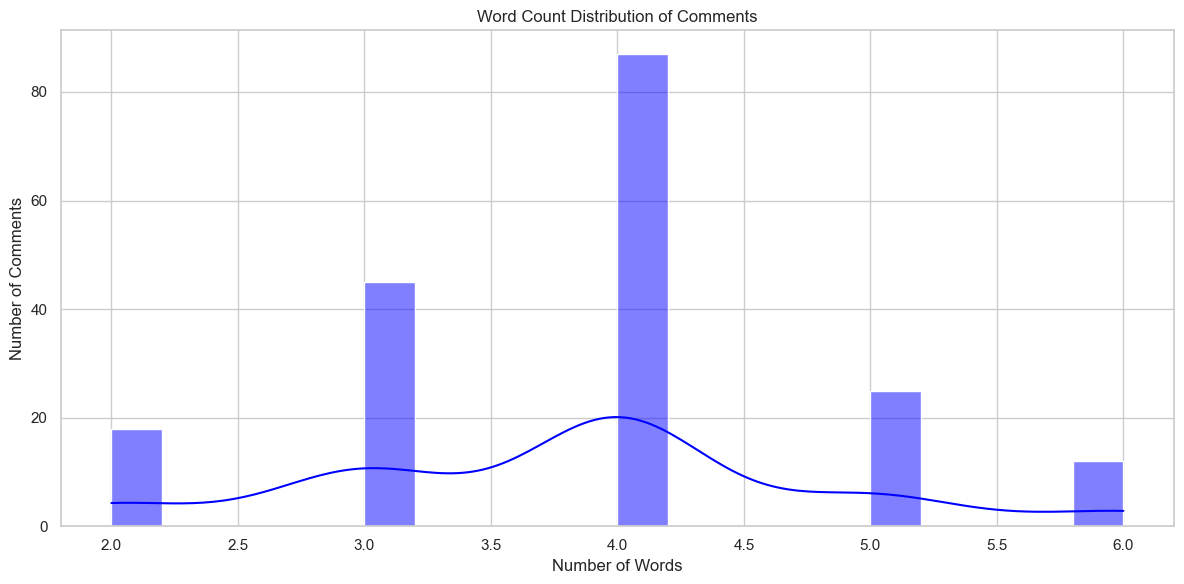

In [47]:
text_col='topics'

# plot the distribution of words
plot_distribution_of_words(df_topics_3, text_col)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 187/187 [01:07<00:00,  2.79it/s]


Using PCA to transformed embeddings


 73%|████████████████████████████████████████████████████████████████████████████████████████▉                                | 36/49 [00:08<00:03,  4.10it/s]

The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 10


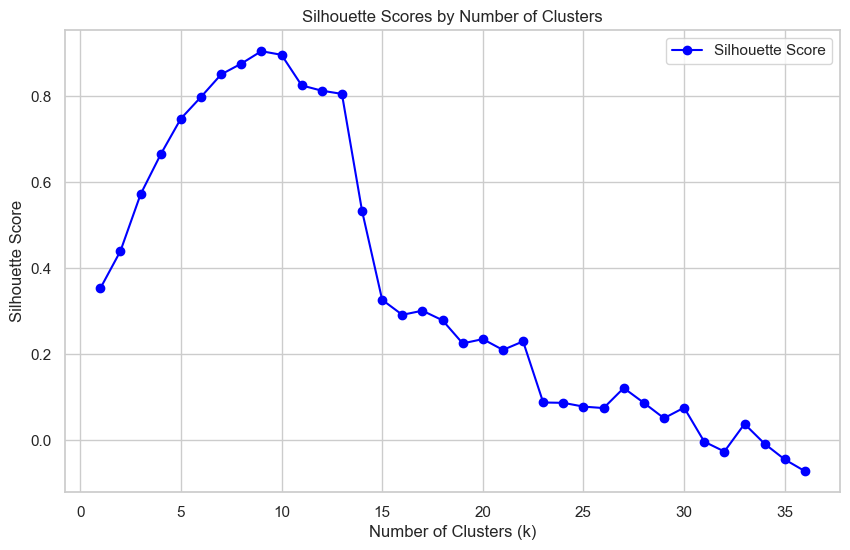

Silhouette score for best kappa: 0.953


In [48]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_topics_4, kmeans_results_2 = calc_clusters_with_kmeans(df=df_topics_3, text_col=text_col, max_token_length=4000, is_pca=(True, 16))

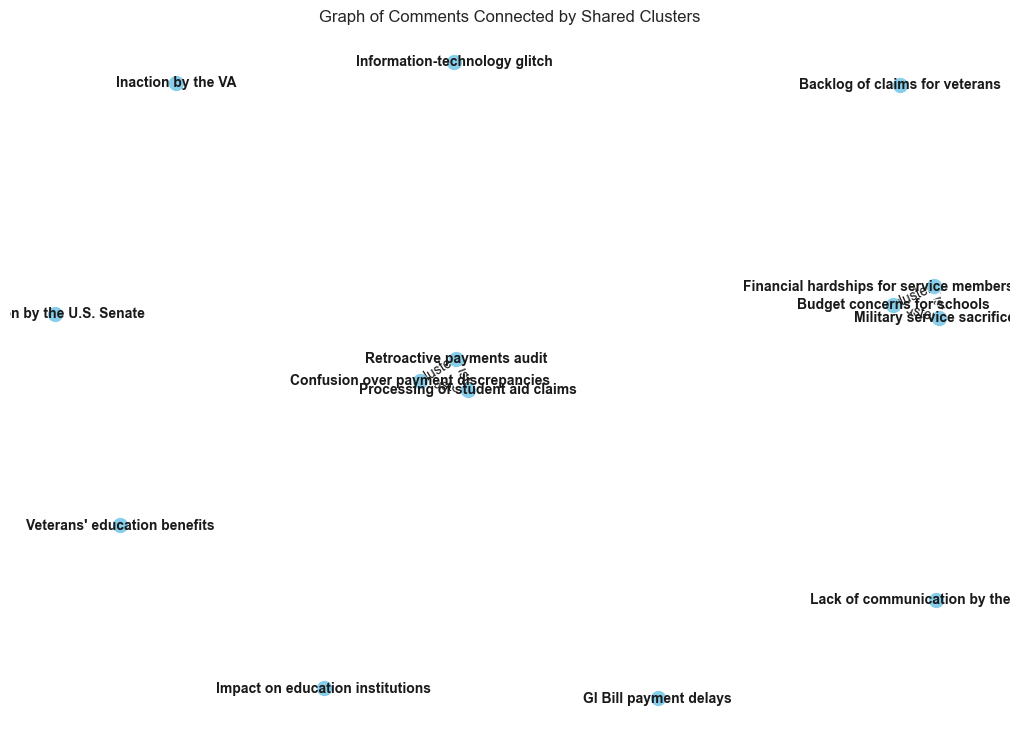

In [49]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Step 1: Create a graph
G = nx.Graph()

# Add nodes (comments)
for comment in df_topics_4['topics'].unique():
    G.add_node(comment)

# Step 2: Add edges based on shared clusters
cluster_to_comments = {}

for index, row in df_topics_4.iterrows():
    comment_id = row['topics']
    cluster_label = row['labels']
    
    if cluster_label not in cluster_to_comments:
        cluster_to_comments[cluster_label] = set()
    cluster_to_comments[cluster_label].add(comment_id)

# Step 3: Connect comments that share clusters
for comments in cluster_to_comments.values():
    comments = list(comments)
    for i in range(len(comments)):
        for j in range(i + 1, len(comments)):
            G.add_edge(comments[i], comments[j])

# Step 4: Plot the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # Spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray', font_size=10, font_weight='bold')

# Draw edge labels to represent shared clusters
edge_labels = {(u, v): f'cluster' for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph of Comments Connected by Shared Clusters")
plt.show()

In [50]:
# rename the columns and merge the proper
df_sum_3 = df_sum_3.reset_index().rename(columns={'index': 'comment_id'})
df_topics_4 = df_topics_4.rename(columns={'comment': 'comment_id'})

df_topics_4 = df_topics_4.merge(df_sum_3[['content', 'comment_id']], how='inner', on='comment_id')

grouped_comments_4 = df_topics_4.groupby('labels').agg(
    comments=('content', lambda x: list(x)),
    topics=('topics', lambda x: set(x)),
    comments_count=('comment_id', lambda x: len(list(x)))
    )

grouped_comments_4 = grouped_comments_4.reset_index()

In [51]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_4 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [52]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col='comments'
language = 'English'
topic = "Veterans' GI Bill payment delays"

# produce the summaries for grouped comments by label
summaries_4 =summarize_comments_by_cluster(df=grouped_comments_4, text_col=text_col, prompt_name=prompt_template_4, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_4 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 0
Several educational institutions are utilizing their own funds to aid students affected by Veterans' GI Bill payment delays. This demonstrates a proactive approach by these institutions to support veterans facing financial difficulties due to delayed payments.
-------------------------------------------------------------------------------------
Summary for cluster label: 1
I'm sorry, but it seems like the comments you provided are not visible. Please share the comments you'd like summarized.
-------------------------------------------------------------------------------------
Summary for cluster label: 2
It seems like there's an issue with the comments provided. Please share the comments you'd like summarized so I can assist you better.
-------------------------------------------------------------------------------------
Summary for cluster label: 3
Several commenters expressed concern over financial aid delays impacting veterans reliant on the GI Bill for 

In [53]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 4th technique
final_summary_4 = final_summary_of_clustered_comments(prompt=prompt_template_final_4, gpt_model='gpt-4o', topic=topic, summaries=summaries_4)

The summaries consistently highlight significant frustration and concern among veterans due to delays in GI Bill payments, which are crucial for covering tuition and living expenses. Many veterans experience financial hardship and stress as a result of these delays, leading to calls for the U.S. Department of Veterans Affairs to enhance the efficiency and transparency of their payment processing systems. Despite the department attributing delays to technological upgrades, veterans find these explanations insufficient, intensifying the demand for accountability and improvement. Comments also acknowledge the efforts of some educational institutions in providing interim financial support, though such initiatives are not universally available. Overall, there is an urgent need for systemic changes to ensure timely disbursements and to better support veterans' educational and financial needs.


### STORE THE FINAL SUMMARIES IN A CSV

In [54]:
final_summaries = {
    'original_summary': original_summary, 
    'time_based_grouping_summarization': final_summary_1,
    'label_based_summarization': final_summary_2,
    'cluster_based_summarization': final_summary_3,
    'topic_extraction_cluster_based_summarization': final_summary_4
}

# Convert dictionary to DataFrame, with the keys as 'technique' and values as 'summary'
final_summaries_df = pd.DataFrame.from_dict(final_summaries, orient='index', columns=['summary']).reset_index()
final_summaries_df.rename(columns={'index': 'technique'}, inplace=True)

final_summaries_df.to_csv('outputs/final_summaries_2.csv', index=False)

In [55]:
final_summaries_df

,technique,summary
0,original_summary,– a major snafu has hit benefit payments to st...
1,time_based_grouping_summarization,The recent discussion surrounding Veterans' GI...
2,label_based_summarization,The discussion on Veterans' GI Bill payment de...
3,cluster_based_summarization,The discussions on Veterans' GI Bill payment d...
4,topic_extraction_cluster_based_summarization,The summaries consistently highlight significa...


In [56]:
import pandas as pd

final_summaries_df = pd.read_csv('outputs/final_summaries.csv')

In [63]:
final_summaries_df.loc[1, 'technique'] = 'time_based_grouping_summarization'

### BENCMARKING BASED ON THE EXTRACTED SUMMARIES OF THE THREE (3) TECHNIQUES

The evaluation will become by using these metrics: ROUGE score, BLEU score and BERTScore

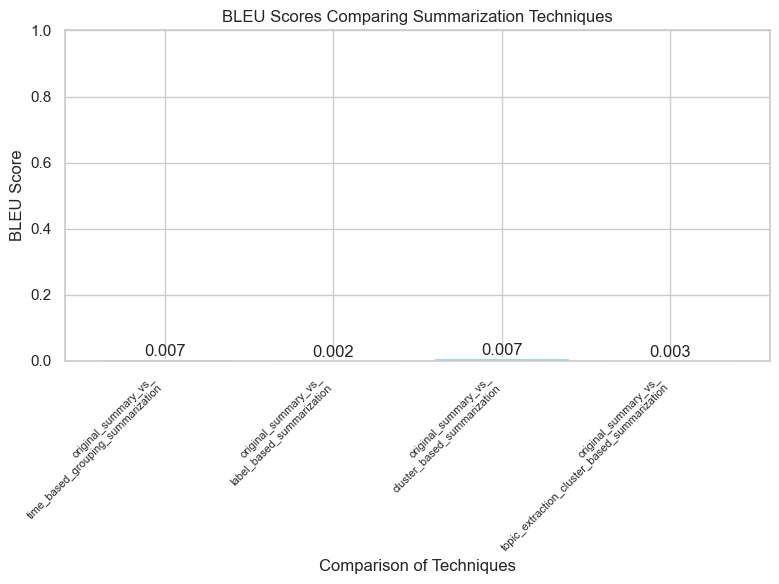

In [64]:
from utils.benchmark_summaries import calc_and_plot_bleu_scores

bleu_scores = calc_and_plot_bleu_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

In [65]:
for summary in final_summaries_df.summary:
    print(summary)
    print('---------------------------------------------------------------------------------')

– a major snafu has hit benefit payments to student veterans under the gi bill — and congressional aides tells nbc that they have been told the veterans are never going to be paid back . the aides say they were told by the department of veterans affairs that the va will not be making retroactive payments to veterans who were underpaid for their housing allowance because it would mean reviewing around 2 millions claims , further delaying implementation of a new system , which has already been pushed back to dec. 2019. under the forever gi bill signed into law by president trump last year , students are supposed to be paid housing allowance based on where they take the most classes , not on where the school ' s main campus is located . tanya ang , vice president of veterans education success , tells the military times that the va ' s excuse of retroactive payments creating too much work isn ' t good enough . " that could be hundreds of dollars for some students — per month , " she says .

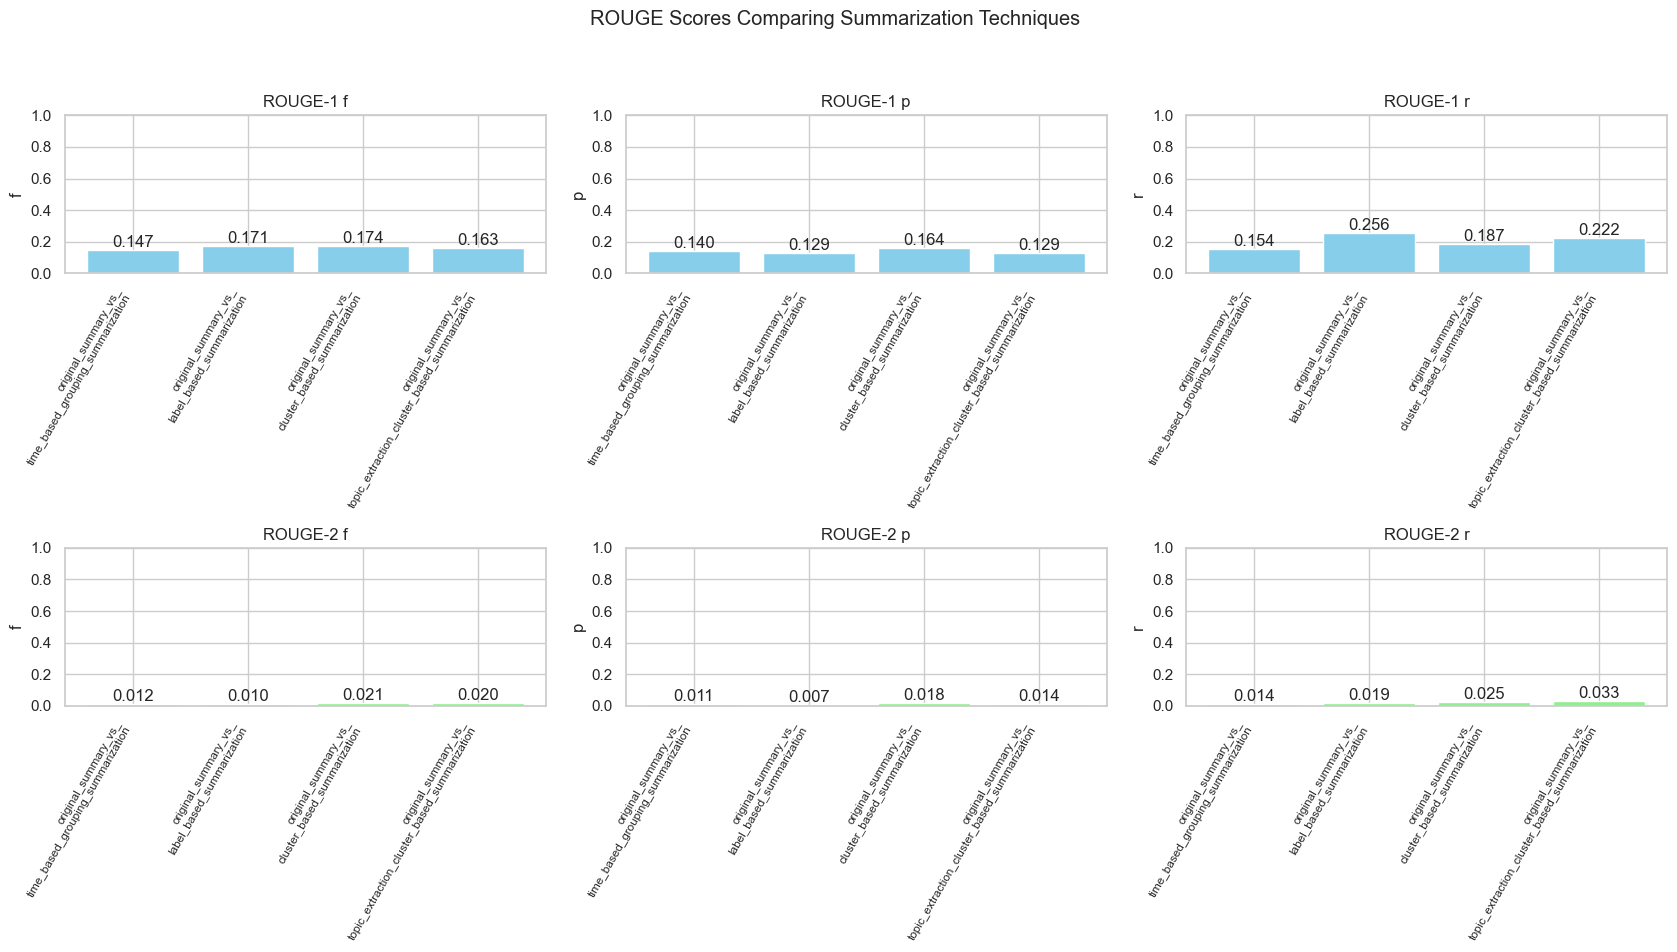

In [68]:
from utils.benchmark_summaries import calc_and_plot_rouge_scores

rouge_scores = calc_and_plot_rouge_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


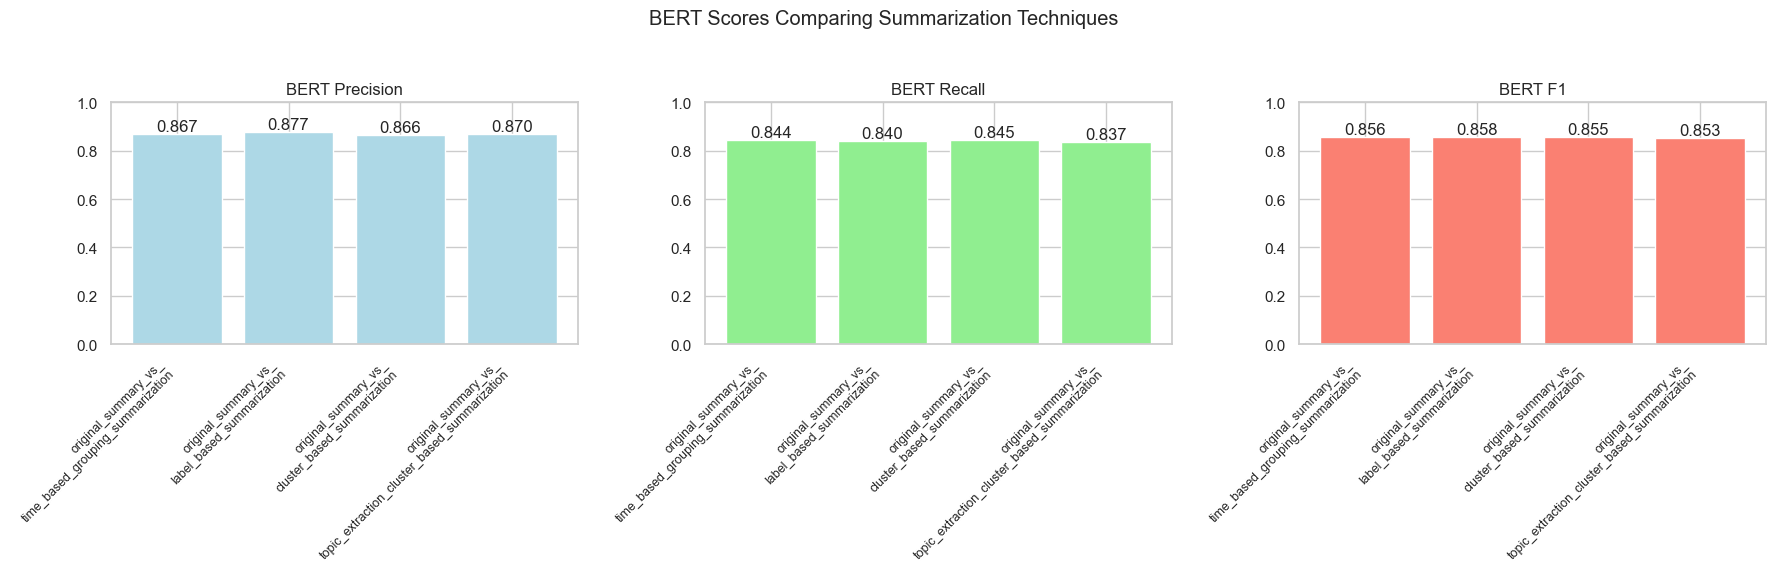

In [69]:
from utils.benchmark_summaries import calc_and_plot_bert_scores

bert_scores = calc_and_plot_bert_scores(summaries_df=final_summaries_df,
                                        text_col='summary',
                                        title_col='technique',
                                        model_to_use='princeton-nlp/sup-simcse-roberta-large',
                                        text_lang='en')